In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv('Facebook_Marketplace_data.csv')

In [3]:
print(df.columns)

Index(['status_id', 'status_type', 'status_published', 'num_reactions',
       'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows',
       'num_hahas', 'num_sads', 'num_angrys', 'Column1', 'Column2', 'Column3',
       'Column4'],
      dtype='object')


In [4]:
print(df.isnull().sum())

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64


1.	How does the time of upload (`status_published`)  affects the `num_reaction`?

In [5]:
print(df['status_published'].value_counts())

status_published
3/20/2018 1:54     3
5/25/2018 6:54     2
5/20/2018 6:18     2
5/17/2018 20:00    2
5/12/2018 1:57     2
                  ..
9/7/2012 0:21      1
9/7/2012 4:32      1
9/7/2012 7:35      1
9/7/2012 7:39      1
9/6/2012 1:13      1
Name: count, Length: 6913, dtype: int64


In [6]:
print(df['num_reactions'].value_counts())

num_reactions
1       131
2       124
0       121
14      121
3       116
       ... 
2320      1
1997      1
2154      1
1526      1
3190      1
Name: count, Length: 1067, dtype: int64


In [7]:
df['status_published']=pd.to_datetime(df['status_published'])
df['hour_of_day']=df['status_published'].dt.hour

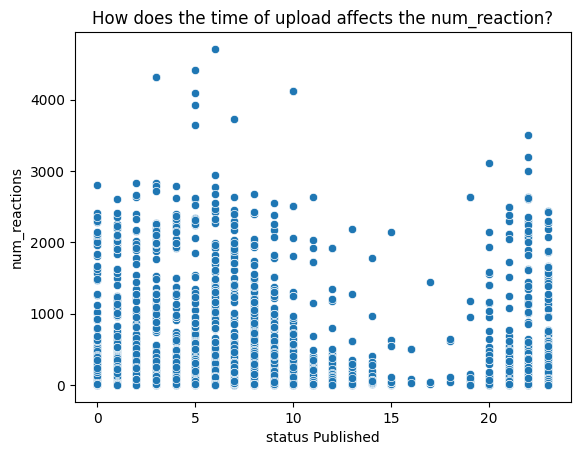

In [8]:
sns.scatterplot(x='hour_of_day',y='num_reactions',data=df)
plt.xlabel('status Published')
plt.ylabel('num_reactions')
plt.title('How does the time of upload affects the num_reaction?')
plt.show()

2.	Is there a correlation between the number of reactions (num_reactions) and other engagement metrics such as comments (num_comments) and shares (num_shares)? If so, what is the strength and direction of this correlation?

In [9]:
print(df['num_reactions'].value_counts())

num_reactions
1       131
2       124
0       121
14      121
3       116
       ... 
2320      1
1997      1
2154      1
1526      1
3190      1
Name: count, Length: 1067, dtype: int64


In [10]:
print(df['num_comments'].value_counts())

num_comments
0       2119
1        564
2        364
3        309
4        249
        ... 
2257       1
1671       1
1469       1
1846       1
1484       1
Name: count, Length: 993, dtype: int64


In [11]:
print(df['num_shares'].value_counts())

num_shares
0      3911
1       820
2       320
3       171
4       113
       ... 
753       1
314       1
316       1
382       1
219       1
Name: count, Length: 501, dtype: int64


               num_reactions  num_comments  num_shares
num_reactions       1.000000      0.150843    0.250723
num_comments        0.150843      1.000000    0.640637
num_shares          0.250723      0.640637    1.000000


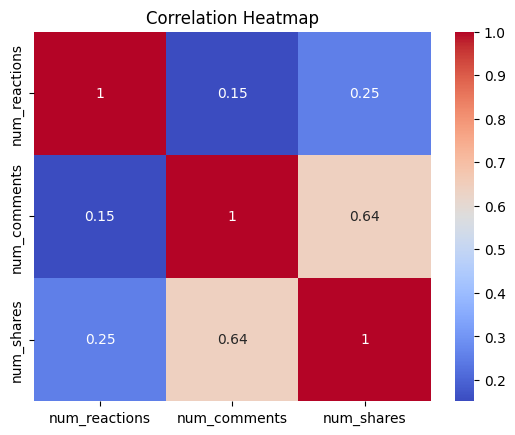

In [12]:
engagement_df = df[['num_reactions', 'num_comments', 'num_shares']]

# Correlation matrix
correlation = engagement_df.corr()
print(correlation)

sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


3.	Use the columns status_type, num_reactions, num_comments, num_shares, num_likes, num_loves, num_wows, num_hahas, num_sads, and num_angrys to train a K-Means clustering model on the Facebook Live Sellers dataset.

In [13]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

features = ['status_type', 'num_reactions', 'num_comments', 'num_shares',
            'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']


df_encoded = pd.get_dummies(df, columns=['status_type'], drop_first=True)

X = df_encoded[[col for col in df_encoded.columns if col.startswith('num_') or 'status_type_' in col]]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

df['cluster'] = kmeans.labels_


4.	Use the elbow method to find the optimum number of clusters.

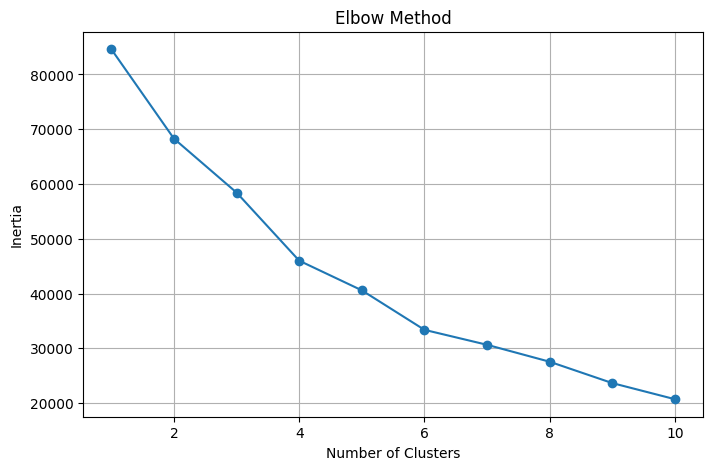

In [14]:
inertia = []
k_range = range(1, 11)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()


5.	What is the count of different types of posts in the dataset?

status_type
photo     4288
video     2334
status     365
link        63
Name: count, dtype: int64


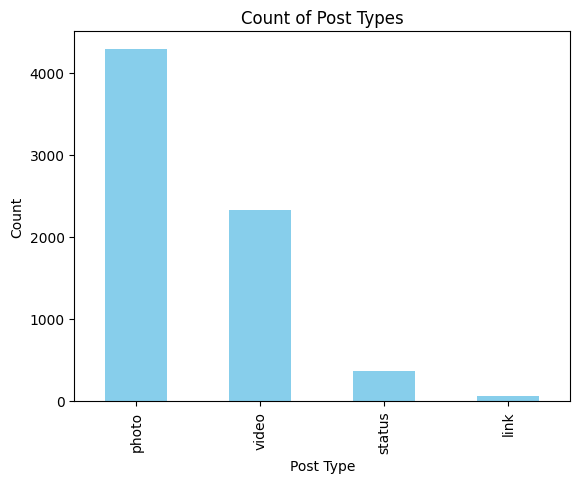

In [15]:
post_counts = df['status_type'].value_counts()
print(post_counts)

post_counts.plot(kind='bar', title='Count of Post Types', color='skyblue')
plt.xlabel('Post Type')
plt.ylabel('Count')
plt.show()


6.	What is the average value of num_reaction, num_comments, num_shares for each post type?

             num_reactions  num_comments  num_shares
status_type                                         
link            370.142857      5.698413    4.396825
photo           181.290345     15.993470    2.553871
status          438.783562     36.238356    2.558904
video           283.409597    642.478149  115.679949


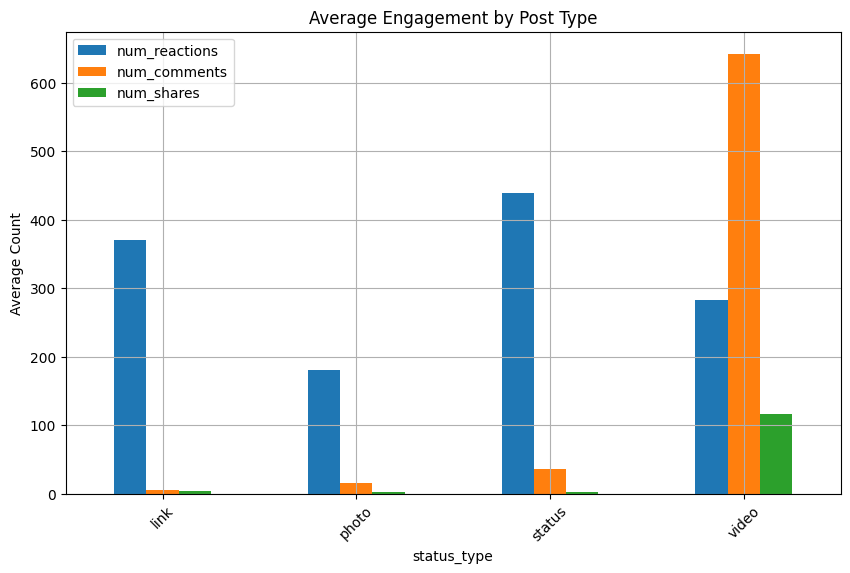

In [16]:
averages = df.groupby('status_type')[['num_reactions', 'num_comments', 'num_shares']].mean()
print(averages)

averages.plot(kind='bar', figsize=(10, 6), title='Average Engagement by Post Type')
plt.ylabel("Average Count")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


Advertising Sales

In [17]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score












In [19]:

from google.colab import files
uploaded = files.upload()


Saving advertising_sales_data.xlsx to advertising_sales_data (2).xlsx


In [20]:
# Read the dataset (assuming an Excel file is uploaded)
file_name = list(uploaded.keys())[0]  # Get the uploaded filename
df = pd.read_excel(file_name)

In [28]:
df = df.select_dtypes(include=[np.number])

In [29]:
if 'Sales' not in df.columns:
    raise ValueError("The dataset must contain a 'Sales' column for analysis.")


In [30]:

# Display first few rows
display(df.head())

TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9



# 1. Calculate the average amount spent on TV advertising

In [31]:
if 'TV' in df.columns:
    average_tv_spend = df['TV'].mean()
    print(f'Average TV Advertising Spend: ${average_tv_spend:.2f}')
else:
    print("TV column not found in dataset.")


Average TV Advertising Spend: $147.04



# 2. Compute correlation between Radio advertising and Sales

In [32]:
if 'Radio' in df.columns:
    correlation_radio_sales = df['Radio'].corr(df['Sales'])
    print(f'Correlation between Radio Advertising and Sales: {correlation_radio_sales:.2f}')
else:
    print("Radio column not found in dataset.")


Correlation between Radio Advertising and Sales: 0.35


3. Determine which advertising medium has the highest impact on sales

In [33]:
correlations = df.corr()['Sales'].drop('Sales', errors='ignore').abs()
if not correlations.empty:
    highest_impact_medium = correlations.idxmax()
    highest_impact_value = correlations.max()
    print(f'Highest impact advertising medium: {highest_impact_medium} (Correlation: {highest_impact_value:.2f})')
else:
    print("No valid numeric advertising columns found to analyze correlation.")

# Handle missing values by filling with median
df.fillna(df.median(), inplace=True)

Highest impact advertising medium: TV (Correlation: 0.90)


 4. Train a linear regression model

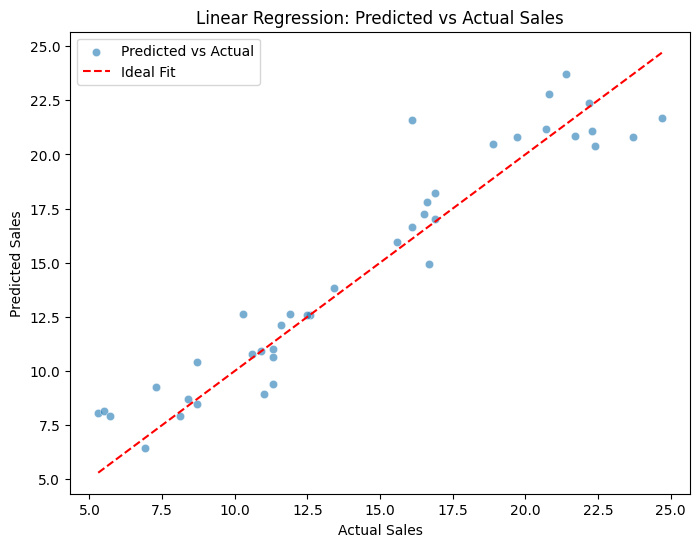

In [35]:
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Predict sales and visualize results
y_pred = model.predict(X_test)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, label='Predicted vs Actual')
sns.lineplot(x=y_test, y=y_test, color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Linear Regression: Predicted vs Actual Sales')
plt.legend()
plt.show()


 5. Predict sales for a new advertising expenditure

In [36]:
if required_columns.issubset(df.columns):
    new_ad_expenditures = pd.DataFrame({'TV': [200], 'Radio': [40], 'Newspaper': [50]})
    predicted_sales = model.predict(new_ad_expenditures)[0]
    print(f'Predicted Sales for $200 TV, $40 Radio, $50 Newspaper: {predicted_sales:.2f} units')


Predicted Sales for $200 TV, $40 Radio, $50 Newspaper: 19.87 units


# 6. Normalize dataset and evaluate model performance

In [37]:
if required_columns.issubset(df.columns):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    model_scaled = LinearRegression()
    model_scaled.fit(X_train_scaled, y_train)
    y_pred_scaled = model_scaled.predict(X_test_scaled)

    r2_original = r2_score(y_test, y_pred)
    r2_scaled = r2_score(y_test, y_pred_scaled)
    print(f'R² Score before normalization: {r2_original:.4f}')
    print(f'R² Score after normalization: {r2_scaled:.4f}')


R² Score before normalization: 0.9061
R² Score after normalization: 0.9061


# 7. Train model using only Radio and Newspaper

In [38]:
if {'Radio', 'Newspaper'}.issubset(df.columns):
    X_reduced = df[['Radio', 'Newspaper']]
    X_train_reduced, X_test_reduced, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

    model_reduced = LinearRegression()
    model_reduced.fit(X_train_reduced, y_train)
    y_pred_reduced = model_reduced.predict(X_test_reduced)

    r2_reduced = r2_score(y_test, y_pred_reduced)
    print(f'R² Score using only Radio & Newspaper: {r2_reduced:.4f}')


R² Score using only Radio & Newspaper: 0.1097
